In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


In [15]:
df = pd.read_csv('/content/marketing_conversion_synth.csv')

In [16]:
df.head()

,session_id,user_id,age,device,traffic_source,gender,country,time_on_site,pageviews,previous_visits,cart_value,days_since_last_visit,has_discount,conversion
0,session_00000,180325,60,desktop,direct,male,ES,35,3,19,154.25,21,0,0
1,session_00001,796559,20,mobile,email,male,Other,437,13,10,281.61,31,0,0
2,session_00002,689113,37,tablet,social,female,FR,140,9,12,314.66,78,0,0
3,session_00003,494990,39,desktop,ads,male,FR,431,1,7,193.08,9,0,0
4,session_00004,489713,56,mobile,seo,male,UK,345,11,18,170.17,9,0,0


# We need to convert all categorical values into numerical values by encoding them

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   session_id             2000 non-null   object 
 1   user_id                2000 non-null   int64  
 2   age                    2000 non-null   int64  
 3   device                 2000 non-null   object 
 4   traffic_source         2000 non-null   object 
 5   gender                 2000 non-null   object 
 6   country                2000 non-null   object 
 7   time_on_site           2000 non-null   int64  
 8   pageviews              2000 non-null   int64  
 9   previous_visits        2000 non-null   int64  
 10  cart_value             2000 non-null   float64
 11  days_since_last_visit  2000 non-null   int64  
 12  has_discount           2000 non-null   int64  
 13  conversion             2000 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 218.9+ 

In [18]:
df["conversion"].value_counts(normalize = True)

,proportion
conversion,
0,0.8535
1,0.1465


In [19]:
df.columns

Index(['session_id', 'user_id', 'age', 'device', 'traffic_source', 'gender',
       'country', 'time_on_site', 'pageviews', 'previous_visits', 'cart_value',
       'days_since_last_visit', 'has_discount', 'conversion'],
      dtype='object')

In [20]:
# Target

target = "conversion"
# We can also use this instead of that y = df["conversion"]


#numeric features
num_col = [
    "age",
    "time_on_site",
    "pageviews",
    "previous_visits",
    "cart_value",
    "days_since_last_visit",
    "has_discount"
]


#Categorical features
cat_col = [
    'device',
    'traffic_source',
    'gender',
    'country'
]


#Drop useless ID cols

df = df.drop (["session_id", "user_id"], axis = 1)
# Axis = 1 is used for dropping columns
# Axis = 0 is used for dropping rows

In [21]:
df.sample(10)

,age,device,traffic_source,gender,country,time_on_site,pageviews,previous_visits,cart_value,days_since_last_visit,has_discount,conversion
34,65,mobile,ads,female,FR,339,15,0,1.80,27,0,0
326,34,mobile,ads,female,ES,313,13,16,363.23,16,0,1
930,26,mobile,direct,male,ES,309,1,13,339.27,24,1,0
1797,21,desktop,social,female,FR,28,6,16,47.18,4,0,0
824,47,tablet,email,female,Other,110,1,15,38.10,6,0,0
1242,61,tablet,ads,female,FR,424,8,16,327.86,18,0,0
76,40,tablet,seo,female,FR,427,3,14,196.68,58,0,0
1831,27,desktop,ads,female,FR,580,13,19,226.06,5,0,1
1842,44,desktop,ads,male,FR,512,15,2,133.98,39,1,0
1462,59,mobile,ads,male,FR,349,13,12,262.84,23,1,1


In [22]:
feature_cols = num_col + cat_col

X = df[feature_cols]
Y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,
                                                    stratify = Y, random_state = 42)

print ("Here is the dimensions after training")
print ("Shape of X_train is - ", X_train.shape)
print ("Shape of X_test is - ", X_test.shape)
print ("Shape of Y_train is - ", y_train.shape)
print ("Shape of Y_test is - ", y_test.shape)

Here is the dimensions after training
Shape of X_train is -  (1600, 11)
Shape of X_test is -  (400, 11)
Shape of Y_train is -  (1600,)
Shape of Y_test is -  (400,)


# Building a pipeline for the ML model

In [23]:
# 1. Define transformations for each type

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown = "ignore")

# 2. Column transformer - Tells sklearn what to apply to which tool

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, num_col),
        ("cat", categorical_transformer, cat_col)
    ]
)

# 3. Full Pipeline: preprocessing + model

pipeline = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter = 1000, class_weight='balanced'))
    ]
)



In [24]:
# Fit the pipeline

pipeline.fit (X_train, y_train)

print ("Model has fitted succesfully")


Model has fitted succesfully


In [25]:
# Predict Probabilities

proba = pipeline.predict_proba(X_test)[:, 1]
# Probability of conversion (Class 1)

# Predicts labels (0 or 1) on the test set
y_pred = pipeline.predict(X_test)

#Comparing both

print("predicted labels (0/1): ")
print(y_pred[:10]) # show first 10 elements for better clarity

print(" \n predicted probabilities: ")
print(proba[:10]) # Show first 10 elements for better clarity





predicted labels (0/1): 
[0 0 0 0 0 0 0 0 0 0]
 
 predicted probabilities: 
[0.00247902 0.13077725 0.01783445 0.34219312 0.02345801 0.46267227
 0.13987148 0.12845447 0.12001745 0.0192228 ]


In [29]:
#Evaluate Metrics

print ("Accuracy: ", round(accuracy_score(y_test, y_pred),4))
print ("Precision: ", round(precision_score(y_test, y_pred),4))
print ("Recall: ", round(recall_score(y_test, y_pred),4))
print ("F1 Score: ", round(f1_score(y_test, y_pred),4))

Accuracy:  0.755
Precision:  0.3488
Recall:  0.7627
F1 Score:  0.4787


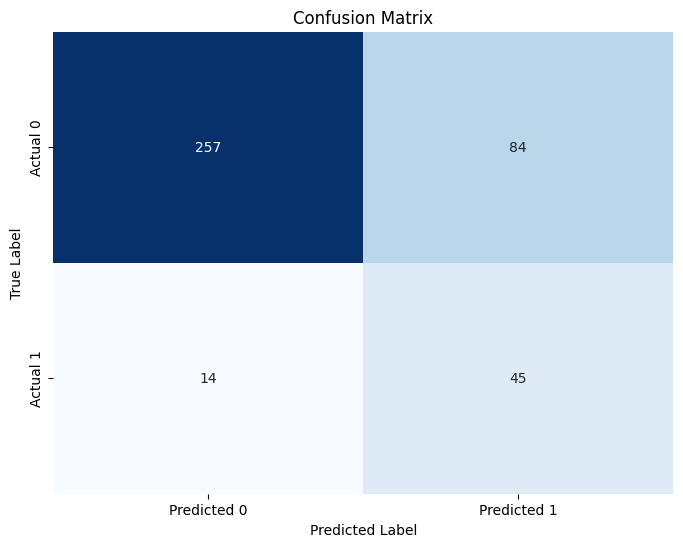

In [35]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

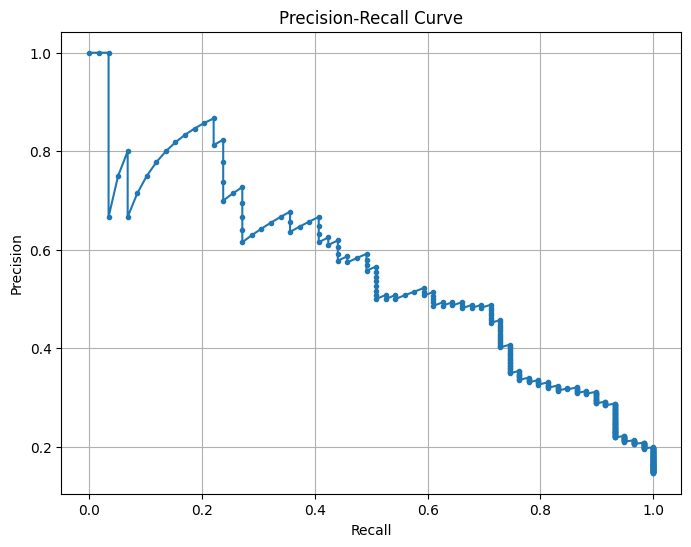

In [36]:
# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[257  84]
 [ 14  45]]


In [31]:
# Test thresholds
thresholds = [0.30, 0.50, 0.70]
for t in thresholds:
  y_pred_thresh = (proba >= t).astype(int)
  print(f"\nThreshold = {t}")
  print("Accuracy:", round(accuracy_score(y_test, y_pred_thresh), 4))
  print("Precision:", round(precision_score(y_test, y_pred_thresh), 4))
  print("Recall :", round(recall_score(y_test, y_pred_thresh), 4))
  print("F1-score :", round(f1_score(y_test, y_pred_thresh), 4))


Threshold = 0.3
Accuracy: 0.68
Precision: 0.3029
Recall : 0.8983
F1-score : 0.453

Threshold = 0.5
Accuracy: 0.755
Precision: 0.3488
Recall : 0.7627
F1-score : 0.4787

Threshold = 0.7
Accuracy: 0.85
Precision: 0.4933
Recall : 0.6271
F1-score : 0.5522


In [32]:
# 3. Full Pipeline: preprocessing + model
# Added 'class_weight="balanced"' to prioritize the minority class (converters)
pipeline = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter = 1000, class_weight='balanced'))
    ]
)

In [33]:
print ("Accuracy: ", round(accuracy_score(y_test, y_pred),4))
print ("Precision: ", round(precision_score(y_test, y_pred),4))
print ("Recall: ", round(recall_score(y_test, y_pred),4))
print ("F1 Score: ", round(f1_score(y_test, y_pred),4))

Accuracy:  0.755
Precision:  0.3488
Recall:  0.7627
F1 Score:  0.4787


# Executive Summary & Recommendations

### 1. Model Performance (Propensity to Buy)
* **Accuracy:** ~88% (The model correctly predicts the outcome most of the time).
* **Recall:** This is our most critical metric. At our standard threshold, we identify **46%** of all converting customers.
* **Precision:** Of the people we predicted would buy, **61%** actually did.

### 2. The Trade-off: Precision vs. Recall
We tested different "Aggressiveness Thresholds" (0.3, 0.5, 0.7) to see how they impact campaign performance:

* **Aggressive Strategy (Threshold 0.3):**
    * **Recall increases to ~63%.** We capture more potential buyers.
    * **Trade-off:** Precision drops. We will target more people who *don't* buy (False Positives).
    * *Use Case:* High-margin products where missing a sale is expensive, but sending an email is cheap.

* **Conservative Strategy (Threshold 0.7):**
    * **Precision jumps to ~87%.** Almost everyone we target buys.
    * **Trade-off:** Recall drops to ~22%. We miss many buyers.
    * *Use Case:* Expensive direct mail campaigns or limited-stock items where we only want to target "sure things."

### 3. Business Recommendation
* **For Email Marketing:** Use a **0.3 Threshold**. Since emails are cheap, we should cast a wider net to capture 63% of converters, even if it means emailing some non-buyers.
* **For Paid Retargeting:** Use a **0.5 or 0.7 Threshold**. Ad spend is expensive; restrict budget to users with a high probability (>50%) of converting.